#### About the dataset


In [1]:
import pandas as pd
import numpy as np

import time

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

#### Data acquisition of the movielens dataset
- users dataset
- rating dataset
- movies dataset

- __MOVIES FILE DESCRIPTION__

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

- __USERS FILE DESCRIPTION__

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"


- __RATINGS FILE DESCRIPTION__


All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

In [2]:
location_movies  = r"E:\MYLEARN\2-ANALYTICS-DataScience\PROJECTS\DS-Project4_Movielens\movies.dat"
location_users   = r"E:\MYLEARN\2-ANALYTICS-DataScience\PROJECTS\DS-Project4_Movielens\users.dat"
location_ratings = r"E:\MYLEARN\2-ANALYTICS-DataScience\PROJECTS\DS-Project4_Movielens\ratings.dat"

In [3]:
col_movies  = ['movieId', "title",  'genres']
col_users   = ['userId',  'Gender', 'Age', 'Occupation', 'Zip-code']
col_ratings = ['userId',  'movieId','rating', 'timestamp']

In [1]:
df_movies  = pd.read_csv(location_movies, sep="::", engine='python', header=None, names=col_movies)
df_users   = pd.read_csv(location_users, sep="::", engine='python', header=None, names=col_users)
df_ratings = pd.read_csv(location_ratings, sep="::", engine='python', header=None, names=col_ratings)

NameError: name 'pd' is not defined

In [5]:
print('Number of rows in movies df  : ', df_movies.shape)
print('Number of rows in users  df  : ', df_users.shape)
print('Number of rows in ratings df : ', df_ratings.shape)

Number of rows in movies df  :  (3883, 3)
Number of rows in users  df  :  (6040, 5)
Number of rows in ratings df :  (1000209, 4)


In [6]:
# first 5 movies rows
df_movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# first 5 users rows
df_users.head(5)

,userId,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
# first 5 ratings rows
df_ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


#### Perform the Exploratory Data Analysis (EDA) for the users dataset

- Visualize user age distribution
- Visualize overall rating by users
- Find and visualize the user rating of the movie “Toy Story”
- Find and visualize the viewership of the movie “Toy Story” by age group
- Find and visualize the top 25 movies by viewership rating
- Find the rating for a particular user of user id = 2696
- Visualize the rating data by user of user id = 2696


In [9]:
# no null instances
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [10]:
# no null instances
df_users.isnull().sum()

userId        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [11]:
# no null instances
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

#### create one merged dataframe

common column : movieId

In [12]:
df_movie_ratings = pd.merge(df_movies, df_ratings)
df_movie_ratings.head(3)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496


In [13]:
print('Movies columns   : ', df_movies.columns)
print('Ratings columns  : ', df_ratings.columns)
print('Combined columns : ', df_movie_ratings.columns)

Movies columns   :  Index(['movieId', 'title', 'genres'], dtype='object')
Ratings columns  :  Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Combined columns :  Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')


#### 2nd merge
common column : userId

In [14]:
df_movie_ratings_users = pd.merge(df_movie_ratings, df_users)
print(df_movie_ratings_users.columns)

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')


In [15]:
# Visualize user age distribution
df_movie_ratings_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
movieId       1000209 non-null int64
title         1000209 non-null object
genres        1000209 non-null object
userId        1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
Zip-code      1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [16]:
# basic stats on fully merged DF

pd.options.display.float_format = '{:,.2f}'.format
df_movie_ratings_users.describe()

,movieId,userId,rating,timestamp,Age,Occupation
count,"1,000,209.00","1,000,209.00","1,000,209.00","1,000,209.00","1,000,209.00","1,000,209.00"
mean,"1,865.54","3,024.51",3.58,"972,243,695.40",29.74,8.04
std,"1,096.04","1,728.41",1.12,"12,152,558.94",11.75,6.53
min,1.00,1.00,1.00,"956,703,932.00",1.00,0.00
25%,"1,030.00","1,506.00",3.00,"965,302,637.00",25.00,2.00
50%,"1,835.00","3,070.00",4.00,"973,018,006.00",25.00,7.00
75%,"2,770.00","4,476.00",4.00,"975,220,939.00",35.00,14.00
max,"3,952.00","6,040.00",5.00,"1,046,454,590.00",56.00,20.00


# pre-processing

In [17]:
t = (2018, 2, 17, 17, 3, 38, 1, 48, 0)
t = time.mktime(t)

print (time.strftime("%Y", time.gmtime(t)))
print (time.strftime("%m", time.gmtime(t)))
print (time.strftime("%d", time.gmtime(t)))
print (time.strftime("%H:%M:%S", time.gmtime(t)))

print (time.strftime("%Z", time.gmtime(t)))

2018
02
17
11:33:38
India Standard Time


In [18]:
df_movie_ratings_users['timestamp'] = df_movie_ratings_users['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))

In [19]:
df_movie_ratings_users.timestamp.head()

0    2001
1    2001
2    2001
3    2001
4    2001
Name: timestamp, dtype: object

In [20]:
# drop the titles col
# df_movie_ratings_users = df_movie_ratings_users.drop('title', axis=1)


In [21]:
df_movie_ratings_users.head()

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,2001,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,2001,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,2001,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,2001,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,2001,F,1,10,48067


# Visualizations

#### Visualize user age distribution

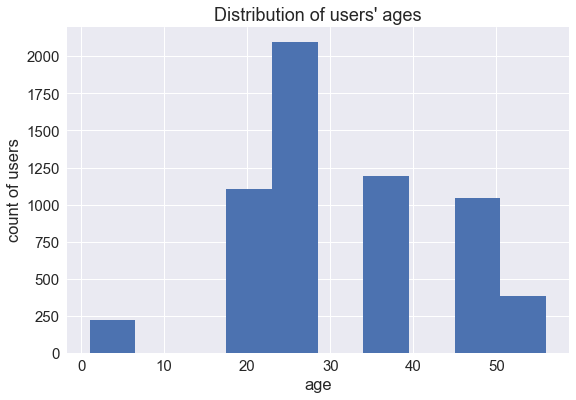

In [89]:
plt.figure(figsize=(9, 6))

df_users.Age.plot.hist()

plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

#### average rating of each movie

In [22]:
df_movie_ratings.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [23]:
df_movie_ratings.groupby('title')['rating'].mean().head()  

title
$1,000,000 Duck (1971)          3.03
'Night Mother (1986)            3.37
'Til There Was You (1997)       2.69
'burbs, The (1989)              2.91
...And Justice for All (1979)   3.71
Name: rating, dtype: float64

In [24]:
# sort the ratings in the descending order of their average ratings:
df_movie_ratings.groupby('title')['rating'].mean().sort_values(ascending=False)[:10]

title
Gate of Heavenly Peace, The (1995)          5.00
Lured (1947)                                5.00
Ulysses (Ulisse) (1954)                     5.00
Smashing Time (1967)                        5.00
Follow the Bitch (1998)                     5.00
Song of Freedom (1936)                      5.00
Bittersweet Motel (2000)                    5.00
Baby, The (1973)                            5.00
One Little Indian (1973)                    5.00
Schlafes Bruder (Brother of Sleep) (1995)   5.00
Name: rating, dtype: float64

In [25]:
# get total number of ratings for a movie

df_movie_ratings.groupby('title')['rating'].count().sort_values(ascending=False)[:10]

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: rating, dtype: int64

#### both the average rating per movie and the number of ratings per movie are important attributes.

In [28]:
ratings_mean_count = pd.DataFrame(data=df_movie_ratings.groupby('title')['rating'].mean()) 
ratings_mean_count['rating_counts'] = pd.DataFrame(df_movie_ratings.groupby('title')['rating'].count())  
ratings_mean_count.columns

Index(['rating', 'rating_counts'], dtype='object')

In [29]:
ratings_mean_count.reset_index(inplace=True)
ratings_mean_count.columns

Index(['title', 'rating', 'rating_counts'], dtype='object')

In [30]:
ratings_mean_count.head()

,title,rating,rating_counts
0,"$1,000,000 Duck (1971)",3.03,37
1,'Night Mother (1986),3.37,70
2,'Til There Was You (1997),2.69,52
3,"'burbs, The (1989)",2.91,303
4,...And Justice for All (1979),3.71,199


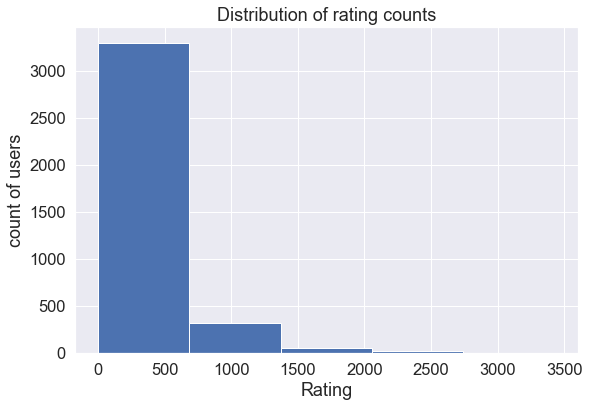

In [31]:
plt.figure(figsize=(9, 6))
ratings_mean_count['rating_counts'].hist(bins=5)  

plt.title("Distribution of rating counts")
plt.ylabel('count of users')
plt.xlabel('Rating');

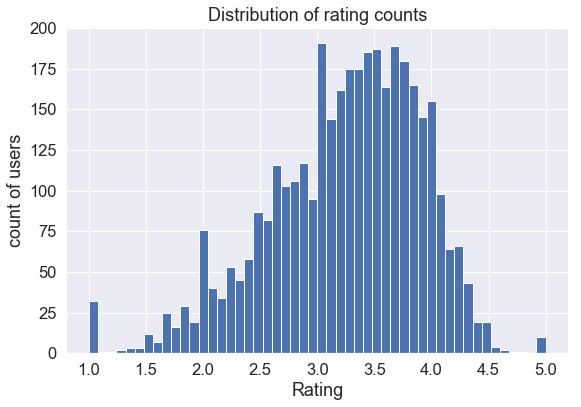

In [32]:
plt.figure(figsize=(9, 6))
ratings_mean_count['rating'].hist(bins=50)  

plt.title("Distribution of rating counts")
plt.ylabel('count of users')
plt.xlabel('Rating');

- data has a __weak normal distribution__ with the mean of around 3.5. 
- There are a few outliers in the data.

#### movies with 
- a higher number of ratings usually have a high average rating 

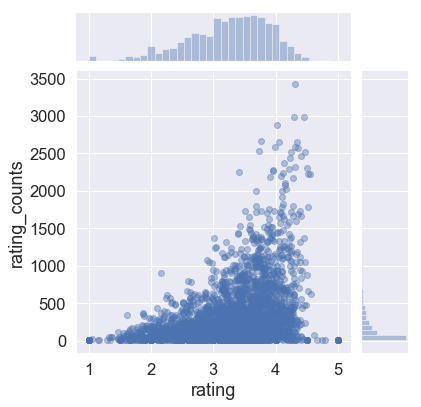

In [33]:
plt.figure(figsize=(10,6))  
plt.rcParams['patch.force_edgecolor'] = True  

sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4) ; 

The graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

#### Find and visualize the user rating of the movie “Toy Story”

In [34]:
df_movie_ratings.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

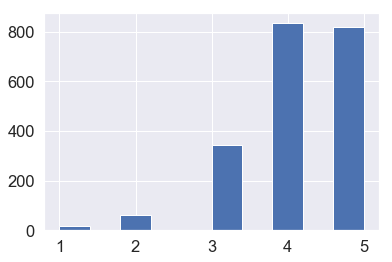

In [35]:
df_movie_ratings[df_movie_ratings['title'] == 'Toy Story (1995)'].rating.hist();

#### Find and visualize the viewership of the movie “Toy Story” by age group

In [36]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_movie_ratings_users['age_group'] = pd.cut(df_movie_ratings_users.Age, range(0, 81, 10), right=False, labels=labels)
#df_users_copy[['age', 'age_group']].drop_duplicates()[:10]

In [37]:
df_movie_ratings_users.head()

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code,age_group
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,2001,F,1,10,48067,0-9
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,2001,F,1,10,48067,0-9
2,150,Apollo 13 (1995),Drama,1,5,2001,F,1,10,48067,0-9
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,2001,F,1,10,48067,0-9
4,527,Schindler's List (1993),Drama|War,1,5,2001,F,1,10,48067,0-9


In [38]:
df_movie_ratings_users.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating     
                size mean
age_group                
0-9        27,211.00 3.55
10-19     183,536.00 3.51
20-29     395,556.00 3.55
30-39     199,003.00 3.62
40-49      83,633.00 3.64
50-59     111,270.00 3.73
60-69            nan  nan
70-79            nan  nan

#### Find and visualize the top 25 movies by viewership rating

In [39]:
df_movie_ratings_users.groupby('title').size().sort_values(ascending=False)[:25]

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

#### Find the rating for a particular user of user id = 2696

In [40]:
df_movie_ratings_users[df_movie_ratings_users['userId'] == 2696]

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code,age_group
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,2000,M,25,7,24210,20-29
991036,800,Lone Star (1996),Drama|Mystery,2696,5,2000,M,25,7,24210,20-29
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,2000,M,25,7,24210,20-29
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,2000,M,25,7,24210,20-29
991039,1258,"Shining, The (1980)",Horror,2696,4,2000,M,25,7,24210,20-29
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,2000,M,25,7,24210,20-29
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,2000,M,25,7,24210,20-29
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,2000,M,25,7,24210,20-29
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,2000,M,25,7,24210,20-29
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,2000,M,25,7,24210,20-29


#### Perform machine learning on first 500 extracted records
•	Use the following features:
    - movie id
    - age
    - occupation
    Use rating as label

- Create train and test data set and perform the following:
    - Create a histogram for movie, age, and occupation


In [41]:
# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


In [104]:
df_movie_ratings_users.shape

(1000209, 11)

In [42]:
feature_cols = ['movieId',
                'Age',
                'Occupation']

response_col = ['rating']


In [43]:
# get the unique rating types
df_movie_ratings_users.rating.unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [107]:
# class balance
df_movie_ratings_users.rating.value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

In [44]:
# extract 500 random rows from the df
df_movie_ratings_users_extract = df_movie_ratings_users.sample(n=500, random_state=0)

In [45]:
X = df_movie_ratings_users_extract[feature_cols].values
y = df_movie_ratings_users_extract[response_col].values.ravel()

In [46]:
# Split into train and test sets.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [47]:
# Create objects of required models.
models = []
models.append(("KNN", 				KNeighborsClassifier()))
models.append(("GNB", 				GaussianNB()))
models.append(("LR", 				LogisticRegression()))
models.append(("DecisionTree", 		DecisionTreeClassifier()))
models.append(("Random Forest",  	RandomForestClassifier()))


In [48]:
# Find accuracy of models.
results = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=0)
    
    cv_result = cross_val_score(model, X, y, cv = kfold, scoring = "accuracy")
    
    results.append(tuple([name, cv_result.mean(), cv_result.std()]))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [49]:
results.sort(key=lambda x: x[1], reverse = True)   
 
for i in range(len(results)):
    print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))

GNB                  35.80 (+/-) 6.37 
LR                   34.60 (+/-) 5.24 
DecisionTree         32.20 (+/-) 4.12 
KNN                  30.20 (+/-) 0.98 
Random Forest        26.60 (+/-) 2.58 


# Try only random forest

In [113]:
df_movie_ratings_users.dtypes

movieId          int64
title           object
genres          object
userId           int64
rating           int64
timestamp       object
Gender          object
Age              int64
Occupation       int64
Zip-code        object
age_group     category
dtype: object

In [114]:
feature_cols = ['genres',
                'rating',
                'Gender',
                'Age',
                'Occupation']

df_movie_ratings_users_extract = df_movie_ratings_users[feature_cols].copy(deep=True)
df_movie_ratings_users_extract.shape

(1000209, 5)

In [115]:
df_movie_ratings_users_extract.dtypes

genres        object
rating         int64
Gender        object
Age            int64
Occupation     int64
dtype: object

In [116]:
def explode(df, lst_cols, fill_value=''):
    
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
        
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [117]:
df_movie_ratings_users_extract.genres = df_movie_ratings_users_extract.genres.str.split('|')
df_movie_ratings_users_extract = explode(df_movie_ratings_users_extract, ['genres'])

In [118]:
df_movie_ratings_users_extract.head()

,genres,rating,Gender,Age,Occupation
0,Animation,5,F,1,10
1,Children's,5,F,1,10
2,Comedy,5,F,1,10
3,Animation,5,F,1,10
4,Children's,5,F,1,10


In [120]:
df_movie_ratings_users_extract.dtypes

genres        object
rating         int64
Gender        object
Age            int64
Occupation     int64
dtype: object

In [121]:
df_movie_ratings_users_extract.genres.unique()

array(['Animation', "Children's", 'Comedy', 'Musical', 'Romance', 'Drama',
       'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Crime',
       'Thriller', 'Western', 'Horror', 'Mystery', 'Documentary',
       'Film-Noir'], dtype=object)

In [122]:
df_movie_ratings_users_extract.shape

(2101815, 5)

In [123]:
# # convert the object datatypes to numeric - one hot encoding
df_movie_ratings_users_extract = pd.get_dummies(df_movie_ratings_users_extract, columns=["genres", "Gender"])

In [124]:
df_movie_ratings_users_extract.shape

(2101815, 23)

In [40]:
# convert the object datatypes to numeric - cat codes
# df_movie_ratings_users_extract["genres"] = df_movie_ratings_users_extract["genres"].astype('category')
# df_movie_ratings_users_extract["Gender"] = df_movie_ratings_users_extract["Gender"].astype('category')

# df_movie_ratings_users_extract["genres_cat"] = df_movie_ratings_users_extract["genres"].cat.codes
# df_movie_ratings_users_extract["Gender_cat"] = df_movie_ratings_users_extract["Gender"].cat.codes

In [125]:
df_movie_ratings_users_extract.head()

,rating,Age,Occupation,genres_Action,genres_Adventure,genres_Animation,genres_Children's,genres_Comedy,genres_Crime,genres_Documentary,...,genres_Horror,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_War,genres_Western,Gender_F,Gender_M
0,5,1,10,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,1,10,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5,1,10,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,1,10,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,1,10,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [126]:
# extract 500 random rows from the df
df_movie_ratings_users_extract = df_movie_ratings_users_extract.sample(n=500, random_state=0)

In [127]:
response_col = ['rating']

In [128]:
X = df_movie_ratings_users_extract.drop('rating', axis=1).values
y = df_movie_ratings_users_extract[response_col].values.ravel()

In [129]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [130]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 22)
(400,)
(100, 22)
(100,)


In [131]:
# instantiate the RF classifier
clf = RandomForestClassifier(n_estimators=100)


In [132]:
# train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [133]:
y_pred = clf.predict(X_test)

In [134]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

Text(0.5,11,'Predicted label')

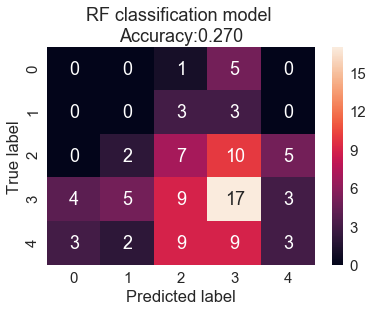

In [135]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.title('RF classification model \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [136]:
# metrics from confusion matrix
# Classification accuracy : Overall how often is the classifier correct?
print(metrics.accuracy_score(y_test, y_pred))

# classification error : Overall how often is the classifier incorrect?
print(1-metrics.accuracy_score(y_test, y_pred))

# Sensitivity : when the actual value is +ve, how often is the predication correct
# Also known as "True Positive Rate" or 'Recall"
# should be MAXIMIZED
# print(metrics.recall_score(y_test, y_pred))

# # Specificity: When the actual value is -ve, how often the prediction correct
# # Also known as "Selective"
# # should be MAXIMIZED

# # False Positive Rate : when the actual value is negative, how often is the 
# # prediction incorrect
# # 1- Specificity

# # Precision: when a +ve value is predicted, how often is the prediction correct?
# print(metrics.precision_score(y_test, y_pred))

0.27
0.73


In [137]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
importances

[0.2316852412908685,
 0.4268442686992217,
 0.026579573168024978,
 0.01881549917730752,
 0.012400369942867912,
 0.01163123413982994,
 0.028128845639578914,
 0.012820286105530689,
 0.0,
 0.02589843153730863,
 0.007956329480080458,
 0.007652318257510782,
 0.016177070568483446,
 0.012976671813515217,
 0.01110718929771572,
 0.020763534274002127,
 0.019120859603971807,
 0.022884876022382147,
 0.015153779446199273,
 0.007857774950752374,
 0.03159043431283101,
 0.03195541227201695]

In [138]:
feature_list = df_movie_ratings_users_extract.drop('rating', axis=1).columns
feature_list

Index(['Age', 'Occupation', 'genres_Action', 'genres_Adventure',
       'genres_Animation', 'genres_Children's', 'genres_Comedy',
       'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Fantasy',
       'genres_Film-Noir', 'genres_Horror', 'genres_Musical', 'genres_Mystery',
       'genres_Romance', 'genres_Sci-Fi', 'genres_Thriller', 'genres_War',
       'genres_Western', 'Gender_F', 'Gender_M'],
      dtype='object')

In [140]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances

[('Age', 0.23),
 ('Occupation', 0.43),
 ('genres_Action', 0.03),
 ('genres_Adventure', 0.02),
 ('genres_Animation', 0.01),
 ("genres_Children's", 0.01),
 ('genres_Comedy', 0.03),
 ('genres_Crime', 0.01),
 ('genres_Documentary', 0.0),
 ('genres_Drama', 0.03),
 ('genres_Fantasy', 0.01),
 ('genres_Film-Noir', 0.01),
 ('genres_Horror', 0.02),
 ('genres_Musical', 0.01),
 ('genres_Mystery', 0.01),
 ('genres_Romance', 0.02),
 ('genres_Sci-Fi', 0.02),
 ('genres_Thriller', 0.02),
 ('genres_War', 0.02),
 ('genres_Western', 0.01),
 ('Gender_F', 0.03),
 ('Gender_M', 0.03)]

In [141]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('Occupation', 0.43),
 ('Age', 0.23),
 ('genres_Action', 0.03),
 ('genres_Comedy', 0.03),
 ('genres_Drama', 0.03),
 ('Gender_F', 0.03),
 ('Gender_M', 0.03),
 ('genres_Adventure', 0.02),
 ('genres_Horror', 0.02),
 ('genres_Romance', 0.02),
 ('genres_Sci-Fi', 0.02),
 ('genres_Thriller', 0.02),
 ('genres_War', 0.02),
 ('genres_Animation', 0.01),
 ("genres_Children's", 0.01),
 ('genres_Crime', 0.01),
 ('genres_Fantasy', 0.01),
 ('genres_Film-Noir', 0.01),
 ('genres_Musical', 0.01),
 ('genres_Mystery', 0.01),
 ('genres_Western', 0.01),
 ('genres_Documentary', 0.0)]